# Dataset D2 - TCRA real

## Importing libraries

In [48]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

## Data reading and formating

In [49]:
data = pd.read_csv('../summary_data/D2_TCRA_real_summary.csv')
data['total_corrections']=data['Base - TP']+ data['Base - FP']

## Defining color dictionary

In [50]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool

In [51]:
data_best = data.loc[data.groupby(["Tool"])["Base Gain"].idxmax()]  

## Selecting average values for each tool

In [52]:
data_avg_sample = data.groupby(['Tool','Sample'],as_index=False).mean()
data_avg_sample = data_avg_sample.fillna(0)

data_best = data.loc[data.groupby(["Tool","Sample"])["Base Gain"].idxmax()]  
data_avg = data_best.groupby(['Tool'],as_index=False).mean()


In [53]:
data_avg.sort_values(by="Base Gain", ascending=True)


,Tool,Unnamed: 0,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,Total Trimmed Reads,...,Total Bases,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Trim Percent,Trim Efficiency,total_corrections
7,Racer,11.500,0.00,76405.625,610556.250,20565.000,180.250,39008.125,105139.000,17858.875,...,2.035951e+08,NaN,100.0,0.616573,0.056525,-10.080699,0.977969,0.000591,0.028458,2857485.750
6,Pollux,373.000,20.00,22634.125,658985.125,90093.750,247.750,18093.125,60674.750,723.875,...,2.025230e+08,NaN,100.0,0.226458,0.234201,-0.543949,0.997014,0.000018,62.373291,194669.750
5,Musket,181.000,20.00,0.000,724243.750,126565.750,0.000,0.000,0.000,667.250,...,2.025230e+08,NaN,100.0,0.000000,inf,0.000000,0.997707,0.000018,inf,0.000
1,Bless,41.375,28.75,59957.750,737459.500,49959.875,178.875,2578.375,1719.875,48699.875,...,2.027770e+08,NaN,100.0,0.411820,0.528237,0.046140,0.982452,0.016098,0.026274,172540.125
8,Reckoner,230.875,23.75,23597.375,725093.500,101145.750,309.875,878.750,829.000,1086.250,...,2.027803e+08,NaN,100.0,0.193752,0.659232,0.097868,0.997867,0.000032,1.312311,96196.750
9,Sga,282.000,30.00,11176.500,725095.250,113923.250,129.625,1452.750,76.875,747.250,...,2.027718e+08,NaN,100.0,0.132433,0.914163,0.120693,0.997933,0.000019,38.796489,54736.750
2,Coral,89.875,29.75,29483.000,721522.250,95850.750,44.250,2189.875,2764.125,982.625,...,2.027752e+08,NaN,100.0,0.178000,0.779568,0.127309,0.997939,0.000020,22.640799,76666.375
3,Fiona,3.500,0.00,83795.250,688253.375,28814.500,4660.625,16057.375,30273.125,1254.750,...,2.028076e+08,NaN,100.0,0.577384,0.586161,0.163593,0.998013,0.000021,6.368177,317689.500
0,Bfc,329.750,29.50,16550.625,723471.250,105874.875,3054.500,2892.875,10.125,668.750,...,2.027717e+08,NaN,100.0,0.172939,0.956380,0.165306,0.998015,0.000018,inf,68037.000
4,Lighter,137.500,29.00,78374.500,713963.875,44960.375,325.375,11966.625,174.000,667.125,...,2.022742e+08,NaN,100.0,0.497627,0.899194,0.441623,0.998548,0.000018,inf,214328.875


<br>
<br>

## Figure 3a
Bar plot depicting the gain across various error correction methods when applied to TCR-Seq data.<br> 
Vertical bars depict the various gains across 10 TCR-Seq samples.
<br>Average value across 10 samples is reported for each tool.

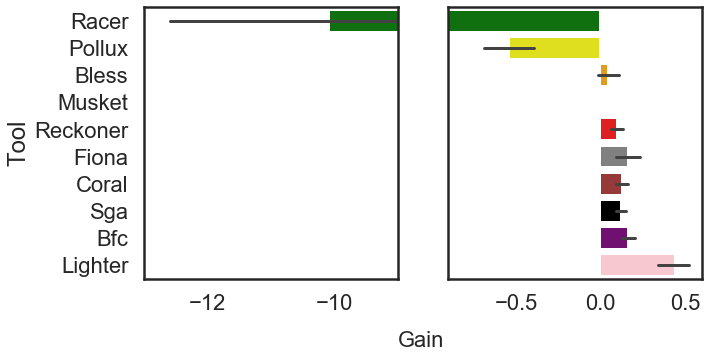

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.set_style("white")
ax=sns.set_context("poster")




f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax = sns.barplot(y="Tool", 
              x="Base Gain",
              data = data_best.sort_values(by="Base Gain", ascending=True), 
              palette=color_dict,
             errwidth=3,ax=ax1)
ax = sns.barplot(y="Tool", 
              x="Base Gain",
              data = data_best.sort_values(by="Base Gain", ascending=True), 
              palette=color_dict,
             errwidth=3,ax=ax2)
#ax = sns.tsplot(time=x, data=y, ax=ax1)
#ax = sns.tsplot(time=x, data=y, ax=ax2)

ax1.set_xlim(-13, -9)
ax2.set_xlim(-.9, 0.6)

ax2.set(xlabel='', ylabel='')
ax1.set(xlabel='')
#sns.despine()

#plt.xlim(-1, 1)

fig = plt.gcf()
fig.set_size_inches(10,5)
ax.text(-1.20, 12,'Gain', fontsize=22)
plt.savefig("../figures/D2_TCRA_real/Fig3a_TCRA_real_human_gain.png", bbox_inches='tight')
plt.savefig("../figures/D2_TCRA_real/Fig3a_TCRA_real_human_gain.pdf", bbox_inches='tight')

##### <br>
<br>

## Figure 3b
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis).<br> 
Average across 10 samples is reported for each tool.

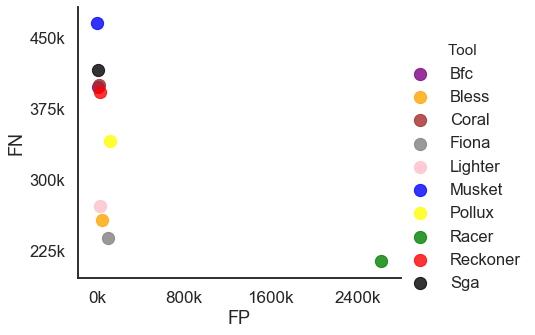

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data = data_avg, 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})
g.set(xlabel='FP', ylabel='FN')
#g.set(xscale='log')

import matplotlib.ticker as tkr

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(75000))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(800000))

plt.savefig("../figures/D2_TCRA_real/Fig3b_FN_vs_FP.png")
plt.savefig("../figures/D2_TCRA_real/Fig3b_FN_vs_FP.pdf")

<br>
<br>

## Figure 3c
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis). 
<br>Average across 10 samples is reported for each tool.

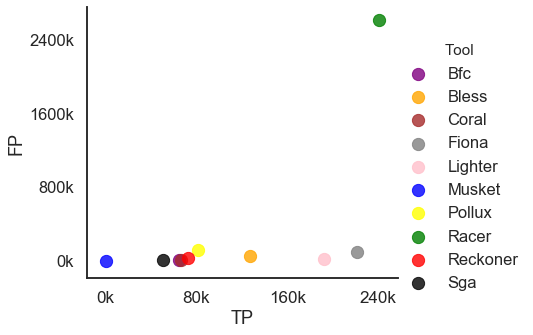

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_avg , 
             x='Base - TP', 
             y='Base - FP', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='TP', ylabel='FP')
    
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(800000))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(80000))
    
g=sns.despine()
plt.savefig("../figures/D2_TCRA_real/Fig3c_Precision_vs_Sensitivity.png")
plt.savefig("../figures/D2_TCRA_real/Fig3c_Precision_vs_Sensitivity.pdf")

<br> 
<br> 

## Figure 3d
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) of each tool. <br>
Average across 10 samples is reported for each tool.


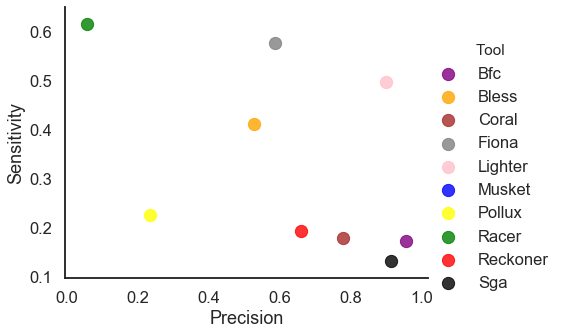

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.lmplot(data=data_avg, 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Precision', ylabel='Sensitivity')
g=sns.despine()

plt.savefig("../figures/D2_TCRA_real/Fig3d_Precision_vs_Sensitivity.png")
plt.savefig("../figures/D2_TCRA_real/Fig3d_Precision_vs_Sensitivity.pdf")

<br>
<br>

## Figure S13
The effect of kmer size on the accuracy of the error correction tools across various coverages settings across 10 real TCR-Seq samples

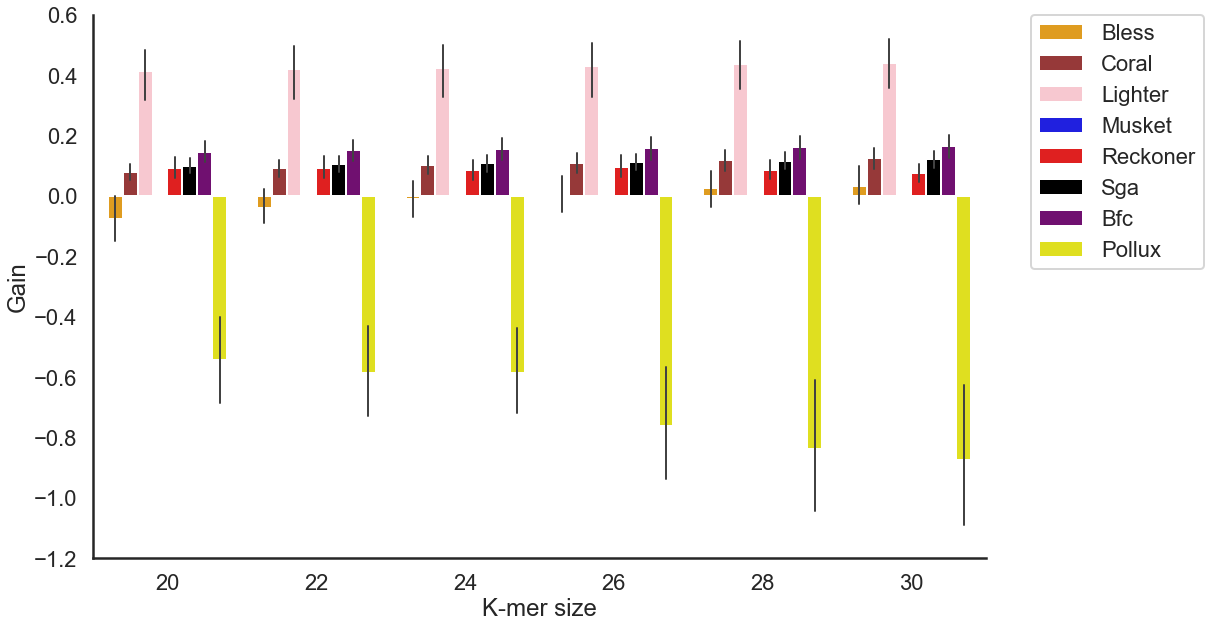

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

g=sns.barplot(x="Kmer Size", 
              y="Base Gain",
              data = data[(data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              hue='Tool',
              palette=color_dict, 
              errwidth=2)
g.set(xlabel='K-mer size', ylabel='Gain')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-1.2, 0.6)
g=sns.despine()

fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.savefig("../figures/D2_TCRA_real/FigS13_kmers_gain.png", bbox_inches='tight')
plt.savefig("../figures/D2_TCRA_real/FigS13_kmers_gain.pdf", bbox_inches='tight')